<a href="https://colab.research.google.com/github/SANJEEVKUMARBG/Linear_regression/blob/main/Insurance_preminum_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

Import required libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the data

In [103]:
df = pd.read_csv('/content/insurance.csv')

Reading the data

In [104]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Descriptive statistics

In [105]:
df.shape

(1338, 7)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [108]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [109]:
data = df.drop_duplicates()

In [110]:
data.shape

(1337, 7)

In [111]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


EDA

Univariate Analysis

In [112]:
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [113]:
data['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [114]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

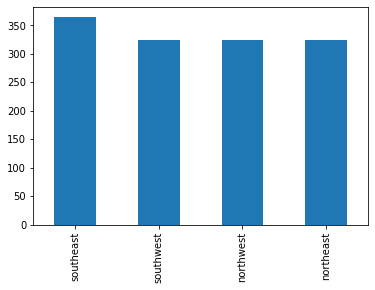

In [115]:
data['region'].value_counts().plot(kind='bar')

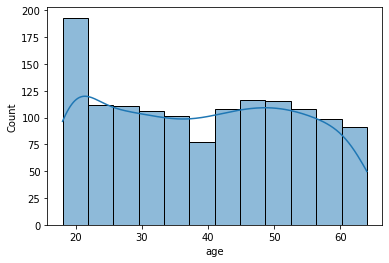

In [116]:
sns.histplot(data['age'], kde=True)

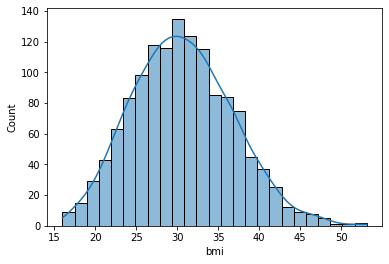

In [117]:
sns.histplot(data['bmi'], kde=True)

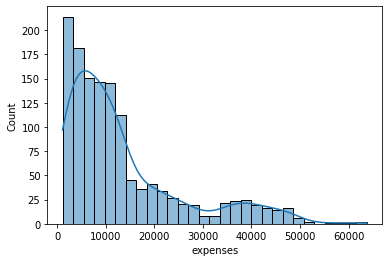

In [118]:
sns.histplot(data['expenses'], kde=True)

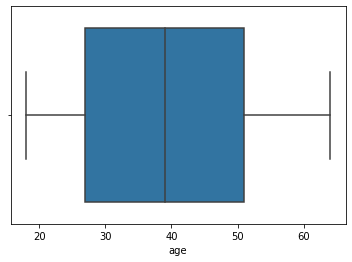

In [119]:
sns.boxplot(data['age'])

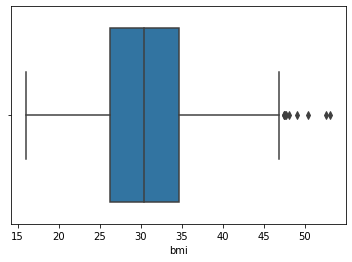

In [120]:
sns.boxplot(data['bmi'])

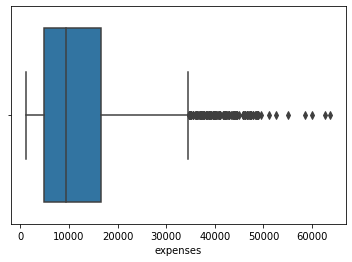

In [121]:
sns.boxplot(data['expenses'])

Bivariate Analysis

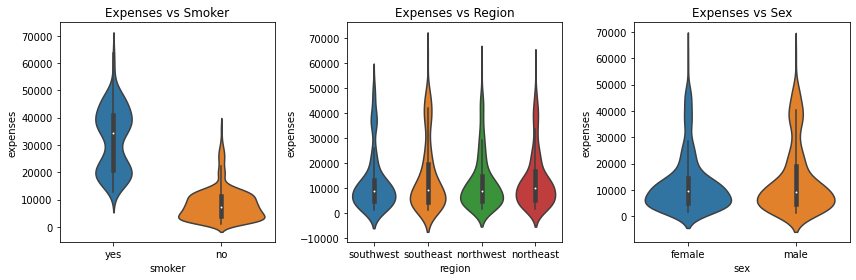

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.violinplot(x="smoker", y="expenses", data=data, ax=ax1)
ax1.set_title("Expenses vs Smoker")
sns.violinplot(x="region", y="expenses", data=data, ax=ax2)
ax2.set_title("Expenses vs Region")
sns.violinplot(x="sex", y="expenses", data=data, ax=ax3)
ax3.set_title("Expenses vs Sex")
plt.tight_layout()
plt.show()
#subplots for bivariate analysis between smoker, region, sex vs expenses

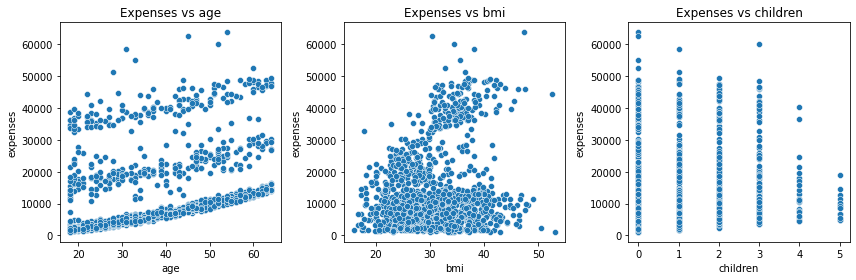

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(x="age", y="expenses", data=data, ax=ax1)
ax1.set_title("Expenses vs age")
sns.scatterplot(x="bmi", y="expenses", data=data, ax=ax2)
ax2.set_title("Expenses vs bmi")
sns.scatterplot(x="children", y="expenses", data=data, ax=ax3)
ax3.set_title("Expenses vs children")
plt.tight_layout()
plt.show()

In [124]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


Multivariate Analysis

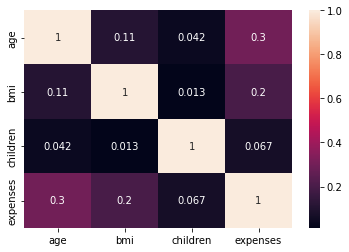

In [125]:
sns.heatmap(data.corr(),annot=True)

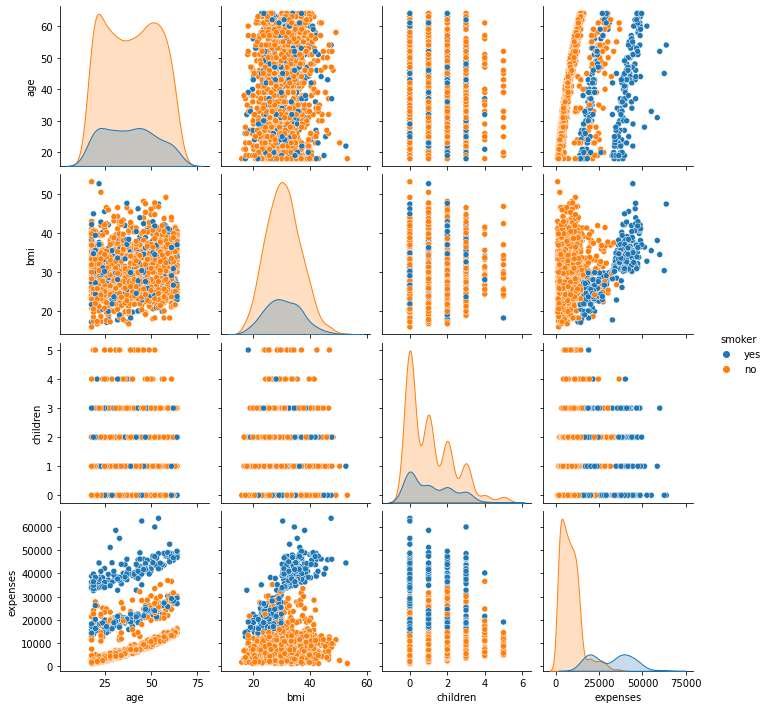

In [126]:
sns.pairplot(data=df,hue='smoker')
plt.show()

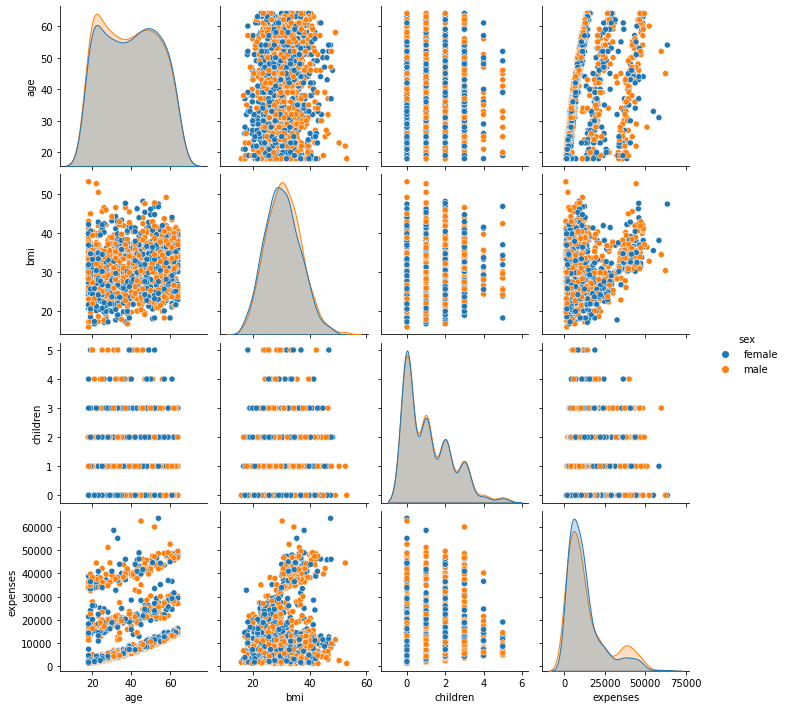

In [127]:
sns.pairplot(data=df,hue='sex')
plt.show()

Feature Engineering

In [128]:
df_num = data.select_dtypes(include=['int64','float64'])
df_cat = data.select_dtypes(include='object')

In [129]:
df_num.drop('expenses',axis=1, inplace=True)
df_num.head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [130]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [131]:
df_cat_en = pd.get_dummies(df_cat, drop_first=True)
df_cat_en.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [132]:
df_new = pd.concat([df_num,df_cat_en,data['expenses']],axis=1)

In [133]:
df_new.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,expenses
0,19,27.9,0,0,1,0,0,1,16884.92
1,18,33.8,1,1,0,0,1,0,1725.55
2,28,33.0,3,1,0,0,1,0,4449.46
3,33,22.7,0,1,0,1,0,0,21984.47
4,32,28.9,0,1,0,1,0,0,3866.86


Train Test split

In [134]:
X = df_new.drop('expenses',axis=1)
y = df_new['expenses']

In [135]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=15)

Model Building

Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [137]:
from sklearn.metrics import r2_score

In [138]:
reg = LinearRegression().fit(Xtrain, ytrain)
ypred = reg.predict(Xtest)
r2 = r2_score(ytest, ypred)
print("r2_score:", r2)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Adjusted R-Squared:", adjusted_r2)

r2_score: 0.7905465765613353
Adjusted R-Squared: 0.784076972748558


Decision Tree

In [139]:
DT = DecisionTreeRegressor().fit(Xtrain, ytrain)
ypred_DT = DT.predict(Xtest)
r2_DT = r2_score(ytest, ypred_DT)
print("r2_score_DT:", r2_DT)
# finding the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_DT = 1 - (1-r2_DT)*(n-1)/(n-p-1)
print("Adjusted R-Squared_DT:", adjusted_r2_DT)

r2_score_DT: 0.7403077473458459
Adjusted R-Squared_DT: 0.7322863650244821


Random Forest

In [140]:
RF = RandomForestRegressor().fit(Xtrain, ytrain)
ypred_RF = RF.predict(Xtest)
r2_RF = r2_score(ytest, ypred_RF)
print("r2_score_RF:", r2_RF)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_RF = 1 - (1-r2_RF)*(n-1)/(n-p-1)
print("Adjusted R-Squared_RF:", adjusted_r2_RF)

r2_score_RF: 0.8626520434750857
Adjusted R-Squared_RF: 0.8584096355515363


Random Forest - GridSearchCV

In [141]:
# create a dictionary of hyperparameters to search
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

# initialize the Random Forest model
rf = RandomForestRegressor()

# initialize the GridSearchCV object with the param_grid and the Random Forest model
grid_search = GridSearchCV(rf, param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X, y)

# get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [142]:
RF_CV = RandomForestRegressor(max_depth=5,min_samples_split=2,n_estimators=200).fit(Xtrain, ytrain)
ypred_RF_CV = RF_CV.predict(Xtest)
r2_RF_CV = r2_score(ytest, ypred_RF_CV)
print("r2_score_RF_CV:", r2_RF_CV)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_RF_CV = 1 - (1-r2_RF_CV)*(n-1)/(n-p-1)
print("Adjusted R-Squared_RF_CV:", adjusted_r2_RF_CV)

r2_score_RF_CV: 0.8872551432509681
Adjusted R-Squared_RF_CV: 0.8837726766332374
